<a href="https://colab.research.google.com/github/garrettfarley9/perudo_simulator/blob/main/tdlambda_perudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Environment

In [10]:
#player_order variable is actually two things
#figure out inheritance. maybe do setters and getters?
#inheritance wouldnt be bad because we would just feed in certain variables into the network
#

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import statistics as stats
import collections

'''
step() function
reset() function

'''
# Set random seed for reproducibility
np.random.seed(1000)

##Global Board
global global_dice, bet_current, player_order
global_dice = []
bet_current = [0,0]
player_order = 0
global_dice_num = 0


##Env class
class Env():
  """

  Attributes:
    global_dice:
  """
  def __init__(self, player_num = 5):
    self.player_num = player_num
    global global_dice
    global_dice = []
    self.players = []
    self.init_players(player_num)
    self.roll_all(player_num)
    global global_dice_num
    global_dice_num = player_num*5
    self.palafico_round = False
    self.turn_order = 0
    # bet_current = [quant, face]
    self.round_num = 0
    self.quant = 0
    self.face = 0
    global bet_current
    bet_current = [self.quant, self.face]

  def step(self):
    global player_order
    global bet_current
    player_order = (player_order+1)%env.player_num



    # if self.is_out(env.players[player_order])== True:
    #   self.step()
    # else:
    env.players[player_order].select_action()

  def roll(self):
    rng = np.random.default_rng()
    self.dice = rng.integers(low=1, high=7, size = self.num_dice)

  def init_players(self, player_num):
    for i in range(player_num):
      self.players.append(Player(player_order=i))

  def roll_all(self, player_num):
    for j in range(player_num):
      self.players[j].roll()
      global global_dice
      global_dice = np.append(global_dice, self.players[j].dice, axis = 0)

  def skip(self):
    global player_order
    player_order += 1
    count = 0
    for p in env.players:
      if p.is_out(p) == True:
        count += 1
    if count == (env.player_num-1):
      print('Game over')


  def game_over(self):
    return any(player.num_dice == 0 for player in self.players)

  def reset(self):
    self.player_num = 5
    self.roll_all(self.player_num)
    self.palafico_round = False
    self.turn_order = 0
    global bet_current
    bet_current = [0,0]
    self.round_num = 0
    global global_dice_num
    global_dice_num = self.player_num*5
    global global_dice
    global_dice = []

  def episode(self):
    global global_dice_num
    global player_order
    # for i in range(1):
    # while global_dice_num >= 5:
    env.players[player_order].select_action()
    #   print(env.players[0].num_dice)
    #   print(env.players[1].num_dice)
    #   print(env.players[2].num_dice)
    #   print(env.players[3].num_dice)
    #   print(env.players[4].num_dice)
    #   print('Round over')
    # env.reset()

##Player class
class Player(Env):
  def __init__(self, player_order):
    self.dice = [0,0,0,0,0]
    self.palafico = False
    self.num_dice = 5
    self.player_order = player_order
    self.out = False

  def deudo(self):
    print('Deudo')
    global player_order
    global global_dice
    counter = collections.Counter(global_dice)
    quant_actual = counter[bet_current[1]] + counter[1]
    if bet_current[0] < quant_actual :
      env.players[(player_order-1)].num_dice -= 1
      player_order -= 1

    else:
      env.players[player_order].num_dice -= 1
      player_order -= 1


  def bet(self):
    global bet_current
    global global_dice_num
    face = bet_current[1]
    rng = np.random.default_rng()
    if (bet_current[0]+1) < global_dice_num:
      quant = rng.integers(low = (bet_current[0]+1), high = global_dice_num)
      if quant == bet_current[0]:
        face = rng.integers(low = (bet_current[1]+1), high = 7)
      elif quant < bet_current[0]:
        face = rng.integers(low = (bet_current[0]+1), high = 7)
      else:
        face = rng.integers(low = 2, high = 7)
    else:
      print('No more dice')
      raise SystemExit
      # self.step()
    bet_current = [quant, face]
    print(bet_current)



  def is_out(self, player):
    if self.num_dice == 0:
      return True
    else:
      return False

  def select_action(self):
    if self.num_dice == True:
      print('I\'m out')
      self.skip()
      self.step()
    else:
      rng = np.random.default_rng()
      if rng.integers(low = 0, high = 2) == 0:
        self.bet()
      else:
        self.deudo()





# width = global_dice
# height = 5

# y_final = width - 1
# x_final = height - 1

# y_wells = [2,3,4,5,6]
# x_wells = [3, 1, 2, 0, 4, 3, 1, 3, 1, 2, 4, 1]



In [1]:
# import numpy as np
# rng = np.random.default_rng()
# global_dice = []
# for i in range(5):
#   x = rng.integers(low=1, high=7, size = 5)
# #x = np.random.Generator.integers(low=1, high=7, size = (1,5,1))
#   print(x)
#   global_dice = np.append(global_dice, x, axis = 0)
# print(global_dice)
# # print(x)
# env = Env()

# print(env.players[3].player_order)
# print(env.players[3-1].player_order)
# env.bet(4,3)
# print(env.players[0].bet_current)
# print(bet_current)



# env.players[0].bet(4,3)
# print(players)
# print(env.bet_current)

# env.deudo()
# print(global_dice)
12%5
10%5

0

In [12]:
if __name__ == '__main__':
  env = Env()
  for g in range(10):
    env.episode()
    if env.game_over():
      break

Deudo
Deudo
Deudo
[3, 3]
Deudo
[5, 6]
[18, 2]
Deudo
Deudo


IndexError: list index out of range

#Statistical Approach

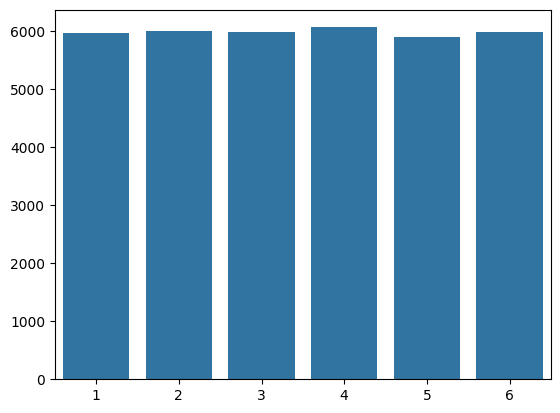

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats
rng = np.random.default_rng()

num_ones = []
one, two, three, four, five, six = 0,0,0,0,0,0
for i in range(10000):
  x = rng.integers(low=1, high=7, size = 5)
  if 1 in x:
    one += 1
  if 2 in x:
    two += 1
  if 3 in x:
    three += 1
  if 4 in x:
    four += 1
  if 5 in x:
    five += 1
  if 6 in x:
    six += 1
cats = ['1','2','3','4','5','6']
data = [one, two, three, four, five, six]
p = sns.barplot(x=cats, y=data)
plt.show()



In [ ]:
print(six/sum(data))
print(25*(six/sum(data)))

0.16666202168278477
4.166550542069619


##TD(L) Implementation

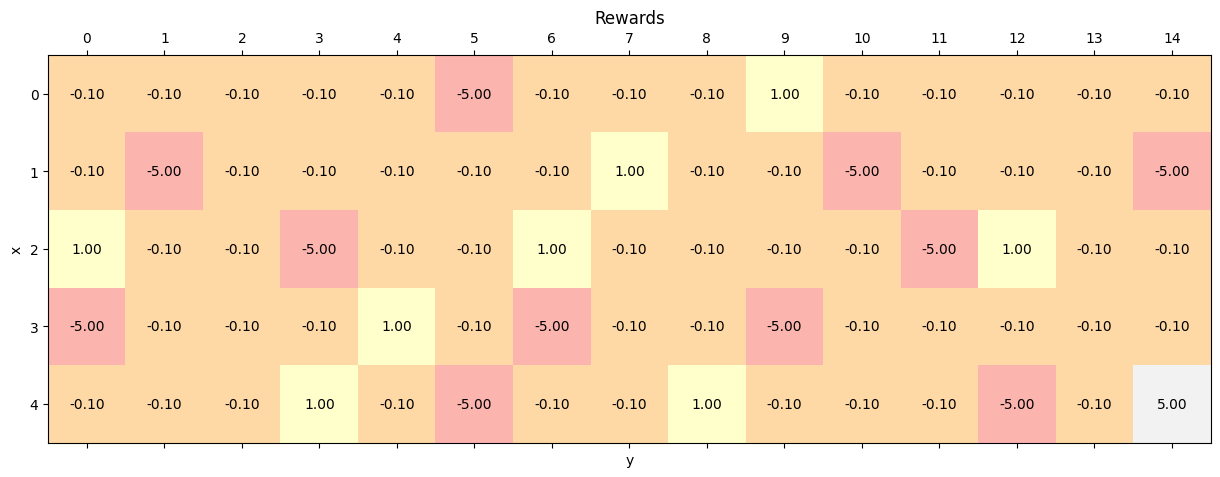

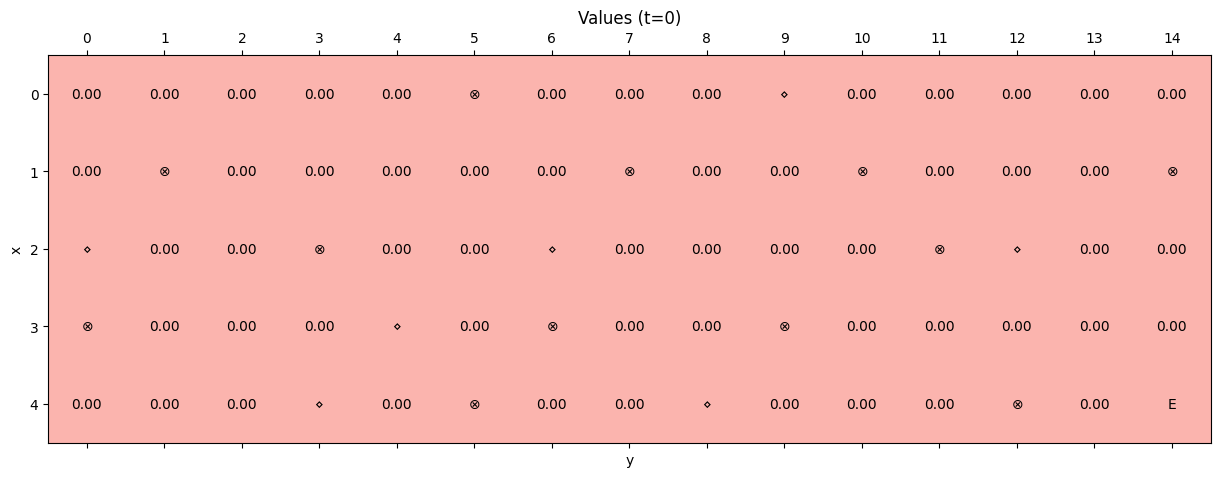

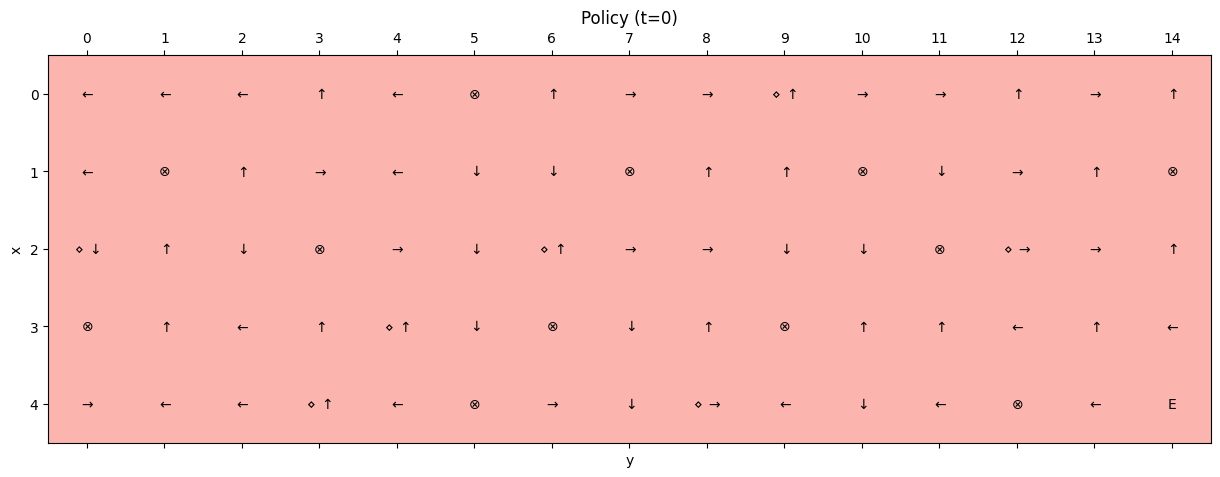

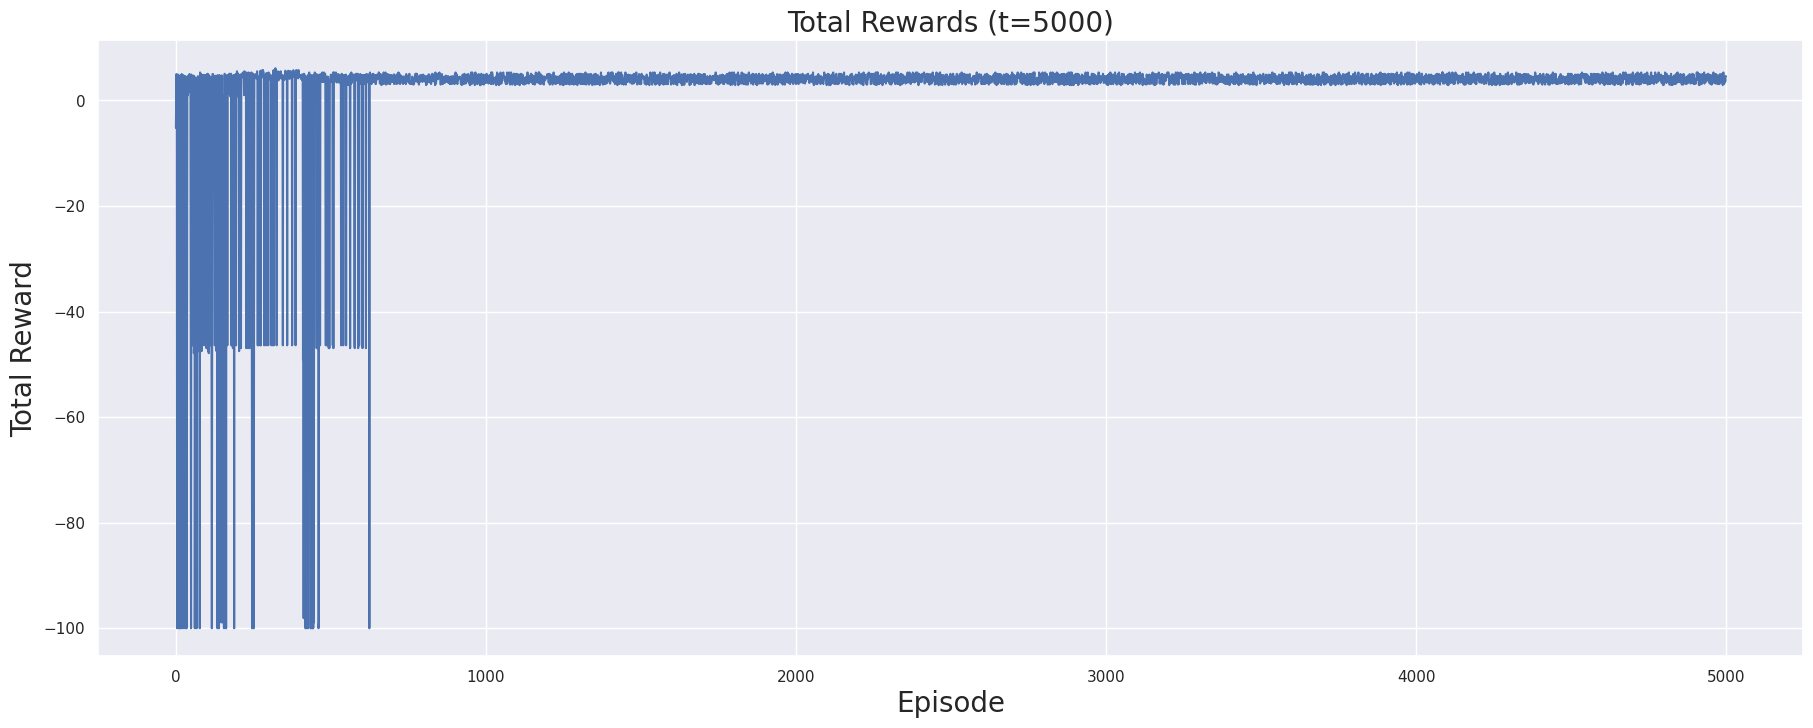

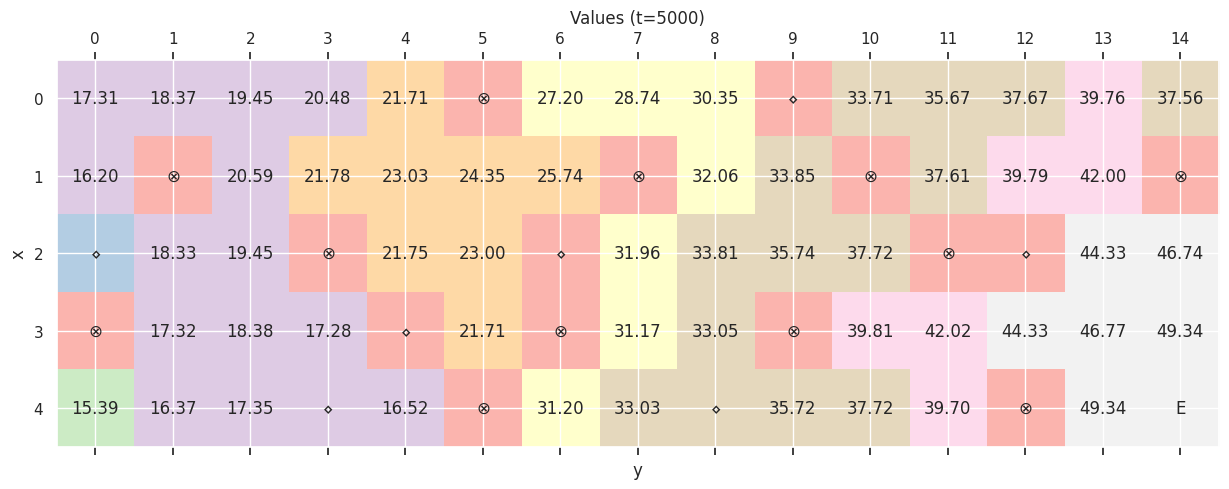

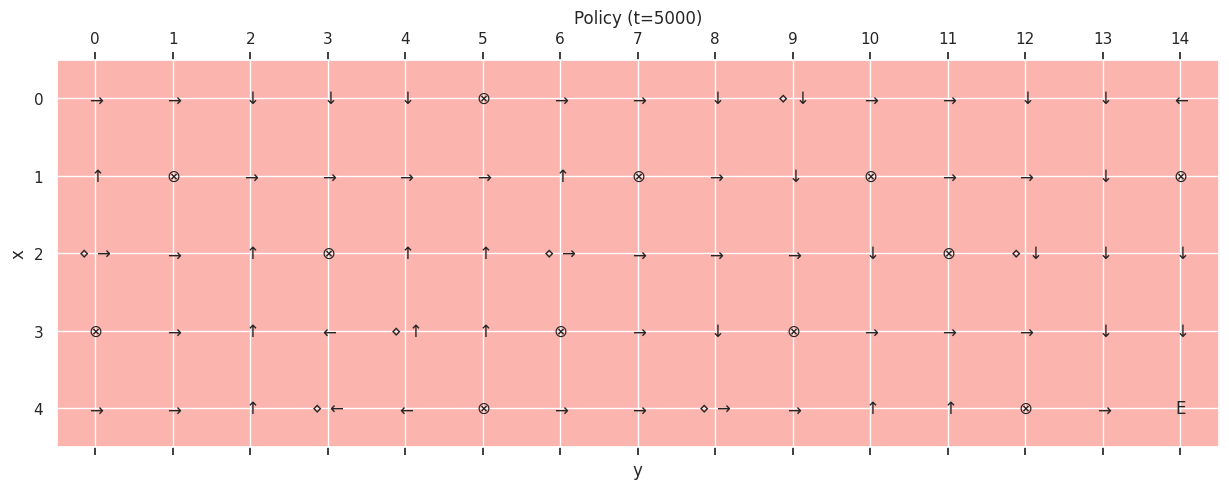

In [ ]:

def observation_space(bet, xs, ys):
  """

  Args:
    bet:Where the current bet is as tuple

  Returns:
    list of in-bounds bet space

  """
  xs = []
  ys = []
  for quant in range(bet[0], global_dice):
    for face in range(2,7):
      xs.append(quant)
      ys.append(face)
  return list(zip(xs, ys))

# y_prizes = [0, 3, 4, 6, 7, 8, 9, 12]
# x_prizes = [2, 4, 3, 2, 1, 4, 0, 2]


gamma = 0.95
tolerance = 1e-5
nb_actions = 2
max_steps = 1000
alpha = 0.25
lambd = 0.6
n_episodes = 5000

standard_reward = -.1
tunnel_rewards = np.ones(shape=(height, width)) * standard_reward

tunnel_values = np.zeros(shape=(height, width))
eligibility_traces = np.zeros(shape=(height, width))
policy = np.random.randint(0, nb_actions,
                           size=(height, width)).astype(np.uint8)

# Setup allowed starting points
xy_grid = np.meshgrid(np.arange(0, height),
                      np.arange(0, width),
                      sparse=False)
xy_grid = np.array(xy_grid).T.reshape(-1, 2)

xy_final = list(zip(x_wells, y_wells)) + list(zip(x_prizes, y_prizes))
xy_final.append([x_final, y_final])

xy_start = []

for x, y in xy_grid:
    if (x, y) not in xy_final:
        xy_start.append([x, y])

xy_start = np.array(xy_start)


def starting_point():
    xy = np.squeeze(xy_start[
                        np.random.randint(
                            0, xy_start.shape[0],
                            size=1)])
    return xy[0], xy[1]


def init_tunnel_rewards():
    for x_well, y_well in zip(x_wells, y_wells):
        tunnel_rewards[x_well, y_well] = -5.0

    for x_prize, y_prize in zip(x_prizes, y_prizes):
        tunnel_rewards[x_prize, y_prize] = 1.0

    tunnel_rewards[x_final, y_final] = 5.0


def show_values(t):
    fig, ax = plt.subplots(figsize=(15, 6))

    ax.matshow(tunnel_values, cmap=cm.Pastel1)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_xticks(np.arange(width))
    ax.set_yticks(np.arange(height))
    ax.set_title('Values (t={})'.format(t))

    for i in range(height):
        for j in range(width):
            if i == x_final and j == y_final:
                msg = 'E'
            elif (i, j) in zip(x_wells, y_wells):
                msg = r'$\otimes$'
            elif (i, j) in zip(x_prizes, y_prizes):
                msg = r'$\diamond$'
            else:
                msg = '{:.2f}'.format(tunnel_values[i, j])
            ax.text(x=j, y=i, s=msg, va='center', ha='center')

    plt.show()


def show_policy(t):
    fig, ax = plt.subplots(figsize=(15, 6))

    ax.matshow(np.zeros_like(tunnel_values), cmap=cm.Pastel1)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_xticks(np.arange(width))
    ax.set_yticks(np.arange(height))
    ax.set_title('Policy (t={})'.format(t))

    for i in range(height):
        for j in range(width):
            action = policy[i, j]

            if i == x_final and j == y_final:
                msg = 'E'
            elif (i, j) in zip(x_wells, y_wells):
                msg = r'$\otimes$'
            else:
                msg = ''
                if (i, j) in zip(x_prizes, y_prizes):
                    msg = r'$\diamond$ '

                if action == 0:
                    msg += r'$\uparrow$'
                elif action == 1:
                    msg += r'$\rightarrow$'
                elif action == 2:
                    msg += r'$\downarrow$'
                else:
                    msg += r'$\leftarrow$'

            ax.text(x=j, y=i, s=msg, va='center', ha='center')

    plt.show()


def is_final(x, y):
    if (x, y) in zip(x_wells, y_wells) or \
            (x, y) == (x_final, y_final):
        return True
    return False


def episode():
    (i, j) = starting_point()
    x = y = 0

    e = 0

    state_history = [(i, j)]

    init_tunnel_rewards()
    total_reward = 0.0

    while e < max_steps:
        e += 1

        action = policy[i, j]

        if action == 0:
            if i == 0:
                x = 0
            else:
                x = i - 1
            y = j

        elif action == 1:
            if j == width - 1:
                y = width - 1
            else:
                y = j + 1
            x = i

        elif action == 2:
            if i == height - 1:
                x = height - 1
            else:
                x = i + 1
            y = j

        else:
            if j == 0:
                y = 0
            else:
                y = j - 1
            x = i

        reward = tunnel_rewards[x, y]
        total_reward += reward

        td_error = reward + (gamma * tunnel_values[x, y]) - tunnel_values[i, j]
        eligibility_traces[i, j] += 1.0

        for sx, sy in state_history:
            tunnel_values[sx, sy] += (alpha * td_error *
                 eligibility_traces[sx, sy])
            eligibility_traces[sx, sy] *= (gamma * lambd)

        if is_final(x, y):
            break
        else:
            i = x
            j = y

            state_history.append([x, y])

            tunnel_rewards[x_prizes, y_prizes] *= 0.85

    return total_reward


def policy_selection():
    for i in range(height):
        for j in range(width):
            if is_final(i, j):
                continue

            values = np.zeros(shape=(nb_actions,))

            values[0] = (tunnel_rewards[i - 1, j] +
                         (gamma *
                          tunnel_values[i - 1, j])) \
                if i > 0 else -np.inf
            values[1] = (tunnel_rewards[i, j + 1] +
                         (gamma *
                          tunnel_values[i, j + 1])) \
                if j < width - 1 else -np.inf
            values[2] = (tunnel_rewards[i + 1, j] +
                         (gamma *
                          tunnel_values[i + 1, j])) \
                if i < height - 1 else -np.inf
            values[3] = (tunnel_rewards[i, j - 1] +
                         (gamma *
                          tunnel_values[i, j - 1])) \
                if j > 0 else -np.inf

            policy[i, j] = np.argmax(values).astype(np.uint8)


if __name__ == '__main__':
    # Init tunnel rewards
    init_tunnel_rewards()

    # Show tunnel rewards
    fig, ax = plt.subplots(figsize=(15, 6))

    ax.matshow(tunnel_rewards, cmap=cm.Pastel1)
    ax.set_xlabel('y')
    ax.set_ylabel('x')
    ax.set_xticks(np.arange(width))
    ax.set_yticks(np.arange(height))
    ax.set_title('Rewards')

    for i in range(height):
        for j in range(width):
            msg = '{:.2f}'.format(tunnel_rewards[i, j])
            ax.text(x=j, y=i, s=msg, va='center', ha='center')

    plt.show()

    # Show initial values
    show_values(t=0)

    # Show initial policy
    show_policy(t=0)

    # Train the model
    total_rewards = []

    for _ in range(n_episodes):
        e_reward = episode()
        total_rewards.append(e_reward)
        policy_selection()

    # Plot the total rewards
    sns.set()
    fig, ax = plt.subplots(figsize=(22, 8))

    ax.plot(total_rewards)
    ax.set_xlabel('Episode', fontsize=20)
    ax.set_ylabel('Total Reward', fontsize=20)
    ax.set_title('Total Rewards (t={})'.format(n_episodes), fontsize=20)
    ax.grid(True)
    plt.show()

    # Show final values
    show_values(t=n_episodes)

    # Show final policy
    show_policy(t=n_episodes)




##Playing around

In [ ]:
# bet_current = (10,4)
global_dice = 25
# quant_bet = np.array(range(bet_current[0], global_dice))
# face_bet = [2,3,4,5,6]
# obs_space = []


# print(observation_space(bet_current))



print(observation_space([15,4]))

y_prizes = [0, 3, 4, 6, 7, 8, 9, 12]
x_prizes = [2, 4, 3, 2, 1, 4, 0, 2]
y_wells = [2,3,4,5,6]
x_wells = [3, 1, 2, 0, 4, 3, 1, 3, 1, 2, 4, 1]
xy_final = list(zip(x_wells, y_wells)) + \
           list(zip(x_prizes, y_prizes))
print(xy_final)

[(15, 2), (15, 3), (15, 4), (15, 5), (15, 6), (16, 2), (16, 3), (16, 4), (16, 5), (16, 6), (17, 2), (17, 3), (17, 4), (17, 5), (17, 6), (18, 2), (18, 3), (18, 4), (18, 5), (18, 6), (19, 2), (19, 3), (19, 4), (19, 5), (19, 6), (20, 2), (20, 3), (20, 4), (20, 5), (20, 6), (21, 2), (21, 3), (21, 4), (21, 5), (21, 6), (22, 2), (22, 3), (22, 4), (22, 5), (22, 6), (23, 2), (23, 3), (23, 4), (23, 5), (23, 6), (24, 2), (24, 3), (24, 4), (24, 5), (24, 6)]
[(3, 2), (1, 3), (2, 4), (0, 5), (4, 6), (2, 0), (4, 3), (3, 4), (2, 6), (1, 7), (4, 8), (0, 9), (2, 12)]


##Policy Gradient

In [ ]:
import torch
import torch.nn as nn
import torchvision

#policy network class
class PolicyNetwork(nn.Module):
  def __init__(self, state_size, action_size):
    super(PolicyNetwork, self).__init__()
    self.fc1 = nn.Linear(state_size, 64)
    self.fc2 = nn.Linear(64, 64)
    # Give the desired size for the output layer
    self.fc3 = nn.Linear(64, action_size)

  def forward(self, state):
    x = torch.relu(self.fc1(torch.tensor(state)))
    x = torch.relu(self.fc2(x))
    # Obtain the action probabilities
    action_probs = torch.softmax(self.fc3(x), dim=-1)
    return action_probs

policy_network = PolicyNetwork(8, 4)
action_probs = policy_network(state)
print('Action probabilities:', action_probs)

NameError: name 'state' is not defined

In [ ]:
#sets up categorical distribution
from torch.distributions import Categorical

def sample_from_distribution(probs):
    print(f"\nInput: {probs}")
    probs = torch.tensor(probs, dtype=torch.float32)
    # Instantiate the categorical distribution
    dist = Categorical(probs)
    # Take one sample from the distribution
    sampled_index = dist.sample()
    print(f"Taking one sample: index {sampled_index}, with associated probability {dist.probs[sampled_index]:.2f}")
#example to test behavior
# Specify 3 positive numbers summing to 1
sample_from_distribution([.3, .4, .3])
# Specify 5 positive numbers that do not sum to 1
sample_from_distribution([2, 14, 92, 47, 23])


Input: [0.3, 0.4, 0.3]
Taking one sample: index 2, with associated probability 0.30

Input: [2, 14, 92, 47, 23]
Taking one sample: index 2, with associated probability 0.52


#REINFORCE

In [ ]:
#select action function
def select_action(policy_network, state):
  # Obtain the action probabilities
  action_probs = policy_network(state)
  print('Action probabilities:', action_probs)
  # Instantiate the action distribution
  action_dist = Categorical(action_probs)
  # Sample an action from the distribution
  action = action_dist.sample()
  log_prob = action_dist.log_prob(action)
  return action.item(), log_prob.reshape(1)

state = torch.rand(8)
action, log_prob = select_action(policy_network, state)
print('Sampled action index:', action)
print(f'Log probability of sampled action: {log_prob.item():.2f}')

Action probabilities: tensor([0.2337, 0.2704, 0.2613, 0.2347], grad_fn=<SoftmaxBackward0>)
Sampled action index: 0
Log probability of sampled action: -1.45


<ipython-input-6-fe802279ddc1>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.relu(self.fc1(torch.tensor(state)))


In [ ]:
#Training loop for REINFORCE
for episode in range(50):
    state, info = env.reset()
    done = False
    episode_reward = 0
    step = 0
    episode_log_probs = torch.tensor([])
    R = 0
    while not done:
        step += 1
        action, log_prob = select_action(policy_network, state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        episode_reward += reward
        # Append to the episode action log probabilities
        episode_log_probs = torch.cat((episode_log_probs, log_prob))
        # Increment the episode return
        R += (gamma ** step) * reward
        state = next_state
    # Calculate the episode loss
    loss = -R * episode_log_probs.sum()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    describe_episode(episode, reward, episode_reward, step)

NameError: name 'env' is not defined